# Exploratory Data Analysis of Cinema 1960-2015
> Written by Kieran Shand

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report, I will be completing an exploratory data analysis on films collected within The Movie Database (TMDb) from 1960-2015. 

TMDb houses over 10,000 movies with a range of core data including the original title, the genre of the film and the production companies who led the projects. I will look to uncover trends and relationships within the database through effective data cleaning and insightful analysis. As a focus, I will use the data to answer the following questions:

- Which parties are the most active and the most profitable in the film industry?
- What qualities create a high revenue generating film?

I will be addressing these core questions directly and will be uncovering answers to peripheral questions as we move through the report.

Before exploring the database, I will complete a Data Wrangling. Within this area of the report I will inspect the data for consistency, clean the data and form sub-dataframes for later analysis. Within the later Exploratory Data Analysis section, I will be using statistics and visualisations to uncover information which will later form answers to the questions I have posed the report. The final section of the report will be the conclusion. A coherent summary of the findings will be documented here.

<a id='wrangling'></a>
## Data Wrangling

### General Properties

I will begin the data wrangling by importing the packages I would like to use and by printing a few lines of the database to build our understanding of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


When inspecting the columns within the database (using info), I identify several areas that will not offer support in answering the reports core questions. I intend to remove these columns.

Given that there are budget and revenue columns which have been adjusted for inflation and therefore offer more explanatory power over time than non-adjusted items, I do not intend to use budget and revenue and will remove these columns. I will remove the imbd_id as there is another id column which is in a shorter form. I do not intend to use popularity, homepage, tagline, overview, keywords, vote count or vote average in the explanatory analysis. I will therefore remove these columns also.

When assessing the make-up of the data (using describe), we find that both the adjusted budget and adjusted revenue are heavily made-up of 0.0 values. In fact, the values are 0.0 until the 50th percentile for both variables (half the results). There are different approaches that can be used to correct this data such as replacing with the mean or median. Given that so many values are 0.0 however, adopting one of these approaches will serve to skew the results towards the mean/ median too greatly. The results will become too distorted, therefore to maintain the reports integrity I will remove the 0.0's and replace them with not a number (NaN) values. A failure of this approach is that many films in the database will not be analysed by adjusted budget/ revenue.

### Data Cleaning

Having inspected the database, I will now look to refine and clean the data. 

> I begin by searching for duplicate records and remove these (duplicated & drop_duplicates).

> I now remove columns that I do not intend to use in the report (drop).

> Finally, through utilising loc and np.nan I replace 0.0 values with NaN values. Using print and isna allows us to see how many NaN values are in the database for these variables. 

In [4]:
df['id'].duplicated().sum()

1

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.drop(columns=['popularity', 'budget', 'revenue', 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'vote_count', 'vote_average'], inplace=True)

In [7]:
df.loc[df['revenue_adj'] == 0.0, ['revenue_adj']] = np.nan

In [8]:
df.loc[df['budget_adj'] == 0.0, ['budget_adj']] = np.nan

In [9]:
print(df['revenue_adj'].isna().sum())
print(df['budget_adj'].isna().sum())

6016
5696


### Creation of Sub-Dataframes & Columns
Through using existing data, I can build out valuable columns and sub-dataframes.
#### Creating month & profit_measure_adj
> By converting the release date into a readable format (using datetime), I am able to create a column that shows the release month of each film (using dt.month). This will be valuable when assessing monthly trends.

> By subtracting adjusted revenue from adjusted budget, I am able to identify a *measure of profit* adjusted for inflation. In the absence of clear cost information, it's important to note that this is not profit. It is an indication of profit based upon the revenue and budget of the film. There is no guarantee that the film kept all costs to or below it's budget, this column hence demonstrates a measure of what the profit/ loss value could be in the radius of.

In [10]:
type(df['release_date'][0])

str

In [11]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [12]:
df['month'] = df['release_date'].dt.month

In [13]:
df['profit_measure_adj'] = df['revenue_adj'] - df['budget_adj']

#### Creating decade and duration
> In order to analyse trends over greater time horizons I create a column for decade. The function pd.cut allows us to bin the release year into clearly defined groups from the 60's to the 2010's. 
 
> Similarly, in order to analyse the duration of a film I bucket the results into clear groups. By using quartiles I statistically place each film into one of four duration groups: short, mid-short, mid-long or long.

In [14]:
bin_names = ['sixties', 'seventies', 'eighties', 'nineties', 'two_thousands', 'tens']
bin_edges = [1960, 1970, 1980, 1990, 2000, 2010, 2020]


df['decade'] = pd.cut(df['release_year'], bin_edges, labels=bin_names)

In [15]:
df['runtime'].describe()

count    10865.000000
mean       102.071790
std         31.382701
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

In [16]:
bin_names_runtime = ['short','mid-short', 'mid-long', 'long']
bin_edges_runtime = [0.0,90.0,99.0,111.0,900.0 ]


df['duration'] = pd.cut(df['runtime'], bin_edges_runtime, labels=bin_names_runtime)

#### Splitting Cells with Several Values
> There are several columns which have more than one value per cell (genre, cast, director & production company). In order to analyse the data in these columns I need to separate the values first. I therefore have created sub-dataframes to divide the information. I begin the process with genre.

> Through splitting the genres column (str.split) and capturing the results in a stack (apply & stack), I create a new row for every genre a film is tagged under. I can therefore drop the original genre column from the dataset (.drop) and replace this with the stacked genres (split_genre). It is important to note that through adopting this approach there will be an entry for every genre the film is tagged under, hence a film will be double counted when it is tagged under two genres.    

> I repeat these steps for cast, director & production company.

In [17]:
df_split_genre = df.copy()

split_genre = df_split_genre['genres'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)

split_genre.name = 'genre_split'

df_split_genre = df_split_genre.drop(['genres'], axis=1).join(split_genre)

In [18]:
df_split_cast = df.copy()

split_cast = df_split_cast['cast'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)

split_cast.name = 'cast_split'

df_split_cast = df_split_cast.drop(['cast'], axis=1).join(split_cast)

In [19]:
df_split_director = df.copy()

split_director = df_split_director['director'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)

split_director.name = 'director_split'

df_split_director = df_split_director.drop(['director'], axis=1).join(split_director)

In [20]:
df_split_production_companies = df.copy()

split_production_companies = df_split_production_companies['production_companies'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)

split_production_companies.name = 'production_companies_split'

df_split_production_companies = df_split_production_companies.drop(['production_companies'], axis=1).join(split_production_companies)

#### Identifying High Revenue Generating Films
> In order to answer the question, *what qualities create a high revenue generating film?* I need to identify a group of films which are highly successful (in terms of revenue) and evaluate whether there are patterns and trends within the films. To do this, I sliced the data to identify the films which fall into the the 75th percentile of adjusted revenue. This will be the database of films which I will later inspect to understand the qualities of high revenue generating films.

In [21]:
df['revenue_adj'].describe()

count    4.849000e+03
mean     1.151009e+08
std      1.988557e+08
min      2.370705e+00
25%      1.046585e+07
50%      4.395666e+07
75%      1.316482e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [22]:
df_75_percentile_genre = df_split_genre.query('revenue_adj >= 1.316482e+08')

#### Inspecting the Data

> Before moving into exploratory data analysis, it's valuable to revist the data.

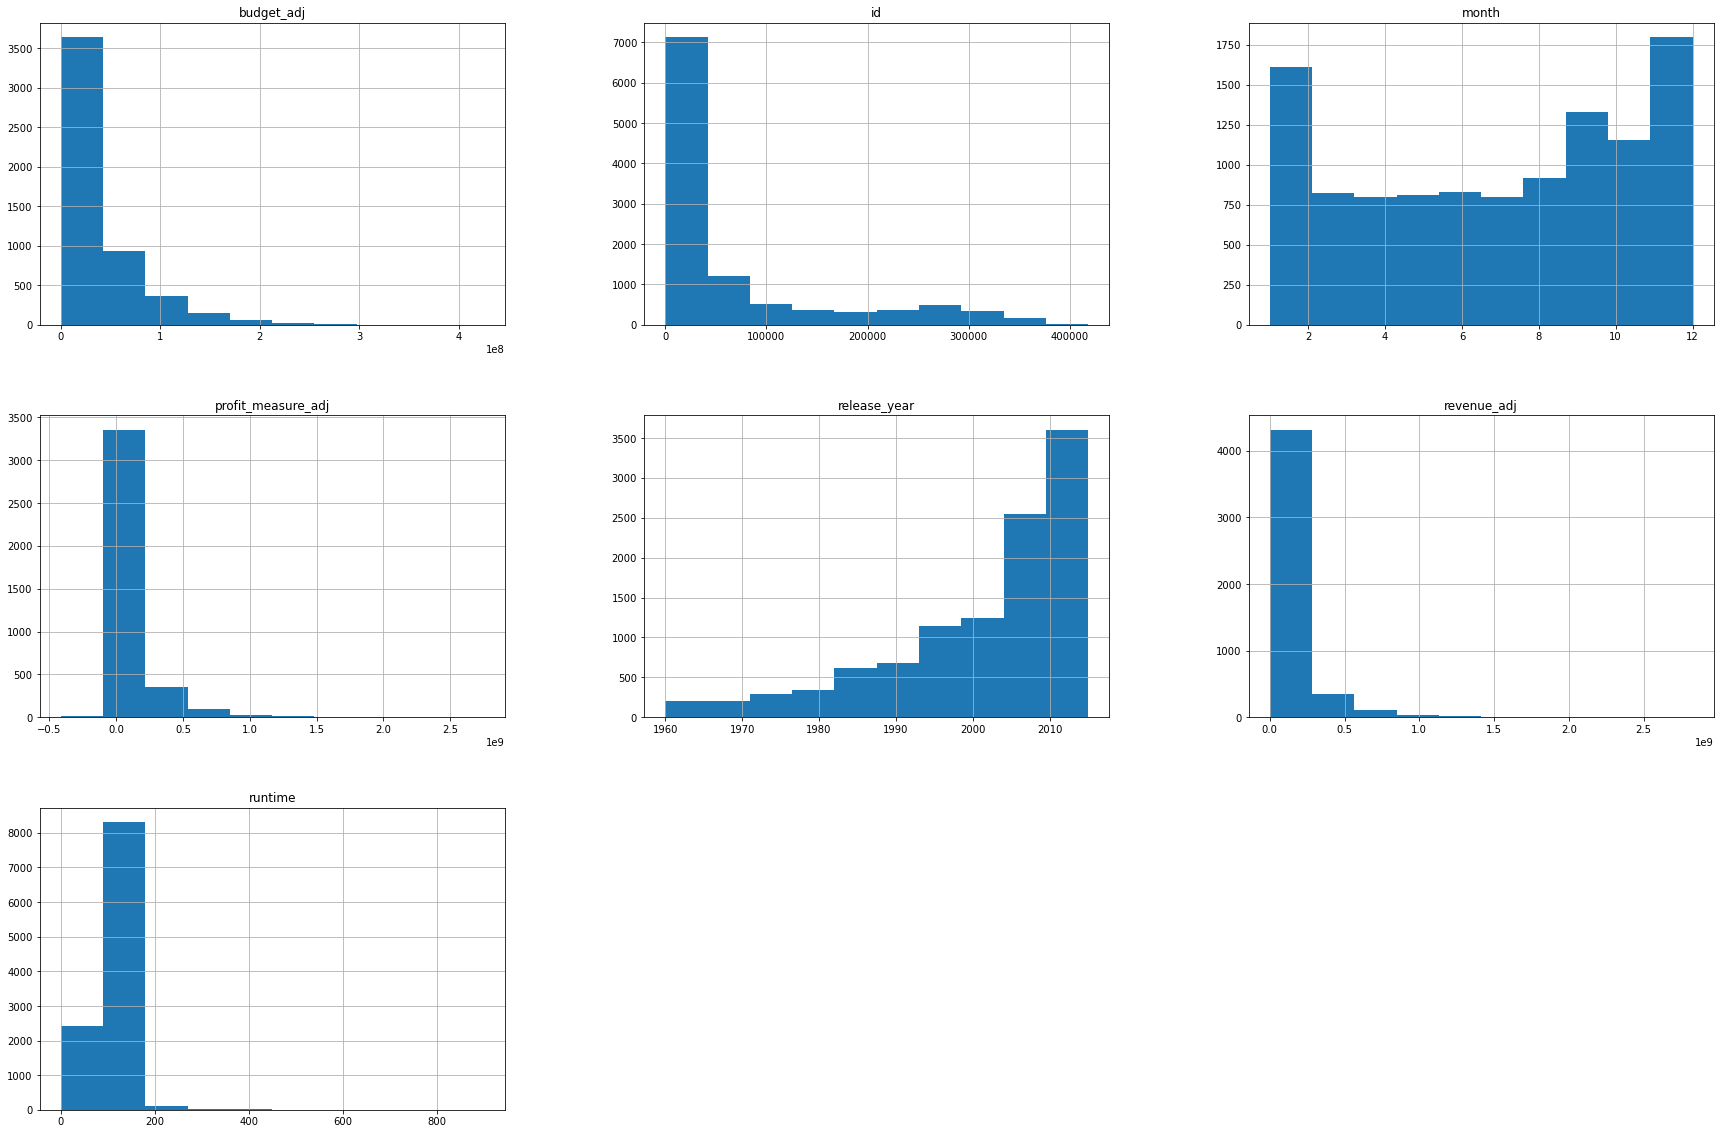

In [23]:
df.hist(figsize=(30,20));

In [24]:
df.describe()

,id,runtime,release_year,budget_adj,revenue_adj,month,profit_measure_adj
count,10865.000000,10865.000000,10865.000000,5.169000e+03,4.849000e+03,10865.000000,3.854000e+03
mean,66066.374413,102.071790,2001.321859,3.688907e+07,1.151009e+08,6.827612,9.282470e+07
std,92134.091971,31.382701,12.813260,4.196096e+07,1.988557e+08,3.441764,1.940715e+08
min,5.000000,0.000000,1960.000000,9.210911e-01,2.370705e+00,1.000000,-4.139124e+08
25%,10596.000000,90.000000,1995.000000,8.102293e+06,1.046585e+07,4.000000,-1.504995e+06
50%,20662.000000,99.000000,2006.000000,2.271505e+07,4.395666e+07,7.000000,2.737064e+07
75%,75612.000000,111.000000,2011.000000,5.008384e+07,1.316482e+08,10.000000,1.074548e+08
max,417859.000000,900.000000,2015.000000,4.250000e+08,2.827124e+09,12.000000,2.750137e+09


As we can see in the above (describe) table, the adjusted budget jumps significantly from one quartile to the next. It will be valuable to understand whether there is an association between high budgets and high revenues in film. 

The histogram of release years shows ever increasing activity in the industry, with the mean release year falling as high as 2001. Perhaps this increased activity has stemmed from increasing profits in recent years.

The average film runtime in the database is 102 minutes, perhaps the most successful films also have a similar duration. 

<a id='eda'></a>
## Exploratory Data Analysis

### The Most Active & The Most Profitable 

Who are the most active and the most profitable in the film industry? How have profits changed over time and what's the most succesful decade and genre? In this section we will use a combination of functions and visualisation to answer these questions.

#### The Most Active in the Industry

In [25]:
df_split_production_companies['production_companies_split'].value_counts().head(10)

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      214
Touchstone Pictures                       178
Columbia Pictures Corporation             160
Name: production_companies_split, dtype: int64

In [26]:
df_split_director['director_split'].value_counts().head(10)

Woody Allen          46
Clint Eastwood       34
Martin Scorsese      31
Steven Spielberg     30
Steven Soderbergh    23
Ridley Scott         23
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           20
Name: director_split, dtype: int64

In [27]:
df_split_cast['cast_split'].value_counts().head(10)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
Morgan Freeman       49
John Goodman         49
Liam Neeson          48
Name: cast_split, dtype: int64

With the data clearly split and defined, I am able to simplistically use value_counts to uncover the most active parties in the film industry. 

- **Production companies:** Universal Pictures, Warner Bros. and Pararmount Pictures

- **Director:** Woody Allen

- **Cast:** Robert De Niro and Samuel L. Jackson

#### The Most Filmed Genre & Decade

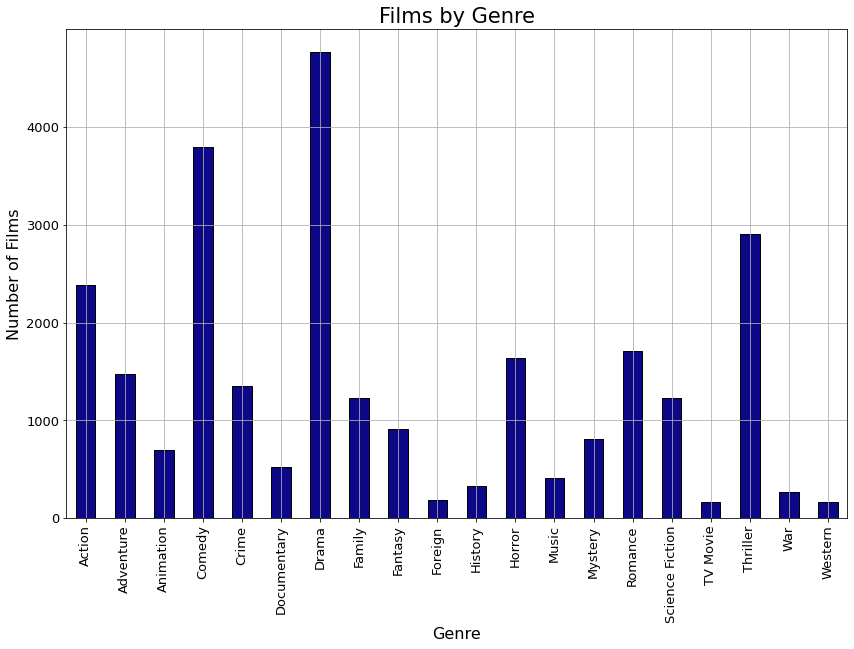

In [28]:
df_split_genre.groupby(['genre_split'])['id'].count().plot(kind='bar', figsize=(14,9), grid=True, fontsize=13, edgecolor='black', colormap='plasma')

plt.title('Films by Genre', fontsize=21)
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Number of Films', fontsize=16)
plt.savefig('genre_all_films.png', dpi = 300);

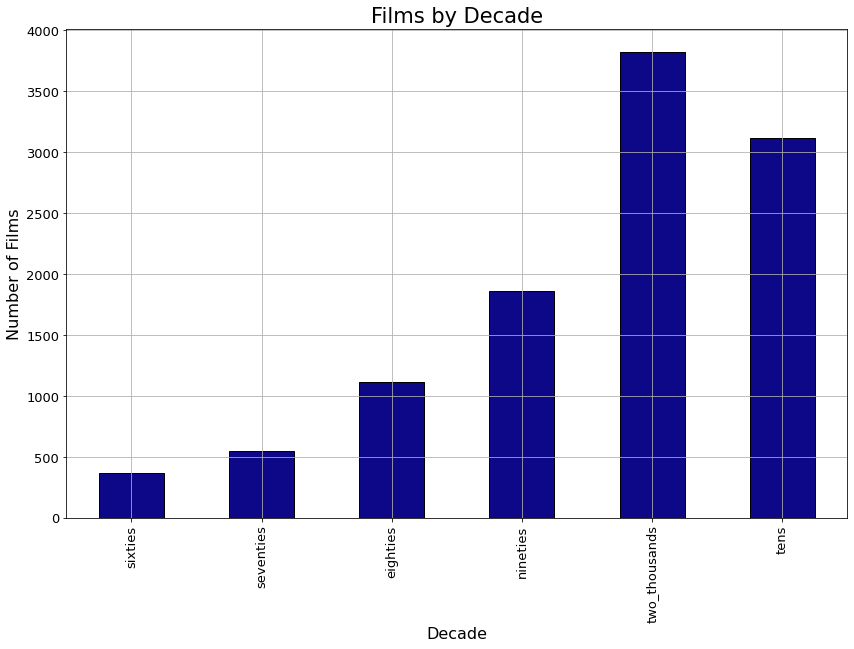

In [29]:
df.groupby(['decade'])['id'].count().plot(kind='bar', figsize=(14,9), grid=True, fontsize=13, edgecolor='black', colormap='plasma')

plt.title('Films by Decade', fontsize=21)
plt.xlabel('Decade', fontsize=16)
plt.ylabel('Number of Films', fontsize=16)
plt.savefig('decade_all_films.png', dpi = 300);

Through using the groupby function and visualisations, I am able to identify that **Drama's, Comedies and Thrillers** are the 3 most filmed genres in the database. Through again utilising groupby, we can see that there is a trend of increasing activity decade to decade (note the dataset concludes in 2015). The most active decade is therefore the most recent fully complete decade - **the 2000's.**

#### The Most Profitable in the Industry

In [30]:
df_split_production_companies.groupby('production_companies_split').sum().sort_values(by=['profit_measure_adj'], ascending=False)['profit_measure_adj'].head(10)

production_companies_split
Warner Bros.                              4.392299e+10
Universal Pictures                        4.261918e+10
Paramount Pictures                        3.810520e+10
Twentieth Century Fox Film Corporation    3.775190e+10
Walt Disney Pictures                      2.555429e+10
Columbia Pictures                         2.031701e+10
Amblin Entertainment                      1.639077e+10
New Line Cinema                           1.591263e+10
Metro-Goldwyn-Mayer (MGM)                 1.344559e+10
Lucasfilm                                 1.308225e+10
Name: profit_measure_adj, dtype: float64

In [31]:
df_split_director.groupby('director_split').sum().sort_values(by=['profit_measure_adj'], ascending=False)['profit_measure_adj'].head(10)

director_split
Steven Spielberg       1.316861e+10
James Cameron          6.296578e+09
George Lucas           5.844159e+09
Peter Jackson          5.645492e+09
Robert Zemeckis        4.335995e+09
Chris Columbus         4.171046e+09
Michael Bay            3.958676e+09
Wolfgang Reitherman    3.490935e+09
David Yates            3.394430e+09
Tim Burton             3.286788e+09
Name: profit_measure_adj, dtype: float64

In [32]:
df_split_cast.groupby('cast_split').sum().sort_values(by=['profit_measure_adj'], ascending=False)['profit_measure_adj'].head(10)

cast_split
Harrison Ford       1.180842e+10
Tom Cruise          8.361769e+09
Tom Hanks           8.079465e+09
Carrie Fisher       7.263715e+09
Emma Watson         7.212040e+09
Daniel Radcliffe    7.071884e+09
Mark Hamill         7.028275e+09
Rupert Grint        6.974591e+09
Ian McKellen        6.576084e+09
Sean Connery        6.181236e+09
Name: profit_measure_adj, dtype: float64

To uncover the most profitable parties in the film industry, I utilised groupby and summed the adjusted profit measure. It is important to note that this indicates the sum of the projects which the company or individual has worked on rather than the sum of payment received.

- **Production companies:** Warner Bros., Universal Pictures and Pararmount Pictures

- **Director:** Steven Spielberg

- **Cast:** Harrison Ford

#### The Most Profitable Genre & Decade

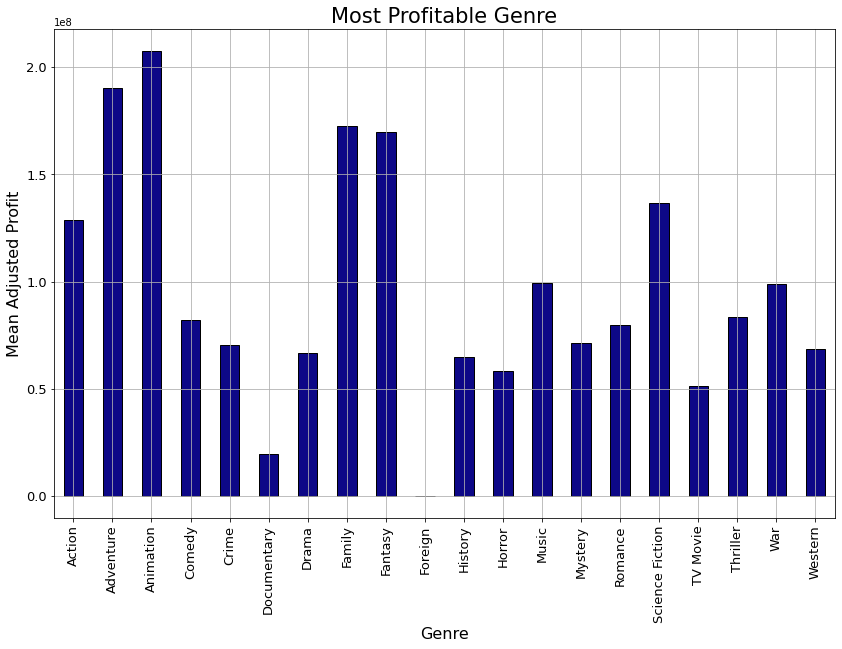

In [33]:
df_split_genre.groupby(['genre_split'])['profit_measure_adj'].mean().plot(kind='bar', figsize=(14,9), grid=True, fontsize=13, edgecolor='black', colormap='plasma')

plt.title('Most Profitable Genre', fontsize=21)
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Mean Adjusted Profit', fontsize=16)
plt.savefig('profit_genre_films.png', dpi = 300);

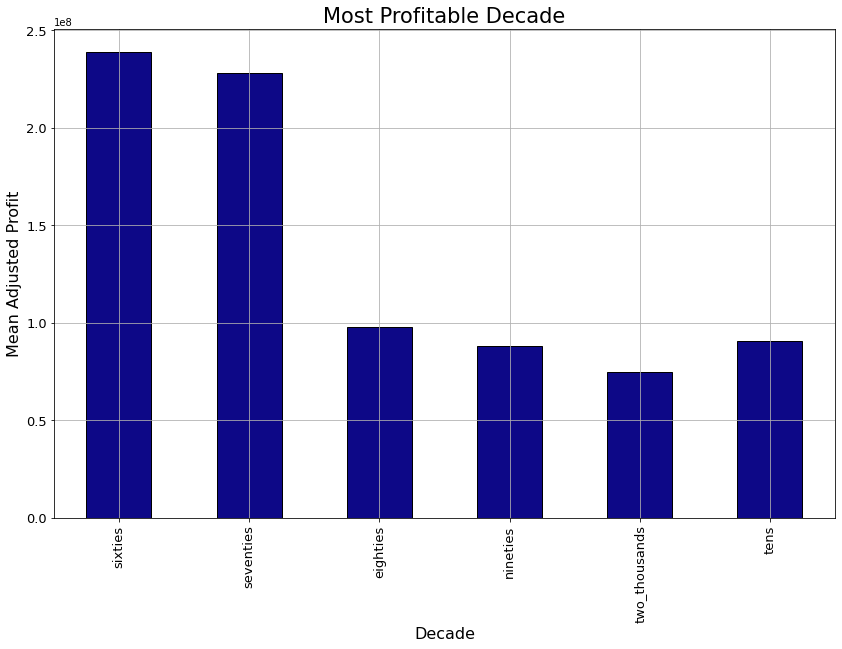

In [34]:
df.groupby(['decade'])['profit_measure_adj'].mean().plot(kind='bar', figsize=(14,9), grid=True, fontsize=13, edgecolor='black', colormap='plasma')

plt.title('Most Profitable Decade', fontsize=21)
plt.xlabel('Decade', fontsize=16)
plt.ylabel('Mean Adjusted Profit', fontsize=16)
plt.savefig('profit_films.png', dpi = 300);

By taking a mean of the adjusted profit measure and grouping the results by genre we can identify that **Adventure and Animation** have the highest profit averages. When grouping the results into decades it becomes clear that the **60's and 70's** were the most profitable decades.

### What Qualities Create a High Revenue Generating Film?

Below lists the top 5 highest revenue generating films (adjusted for inflation) between 1960-2015. What makes these films a commercial success and are there identifiable trends in high revenue generating films? We will inspect films which fall into the 75th percentile of adjusted revenue to answer these questions.

In [35]:
df[['original_title', 'release_date','runtime', 'production_companies', 'director', 'cast' ,  'genres',  'budget_adj', 'revenue_adj']].sort_values(by=['revenue_adj'], ascending=False).head(5)

,original_title,release_date,runtime,production_companies,director,cast,genres,budget_adj,revenue_adj
1386,Avatar,2009-12-10,162,Ingenious Film Partners|Twentieth Century Fox ...,James Cameron,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Action|Adventure|Fantasy|Science Fiction,2.408869e+08,2.827124e+09
1329,Star Wars,1977-03-20,121,Lucasfilm|Twentieth Century Fox Film Corporation,George Lucas,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,Adventure|Action|Science Fiction,3.957559e+07,2.789712e+09
5231,Titanic,1997-11-18,194,Paramount Pictures|Twentieth Century Fox Film ...,James Cameron,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,Drama|Romance|Thriller,2.716921e+08,2.506406e+09
10594,The Exorcist,1973-12-26,122,Warner Bros.|Hoya Productions,William Friedkin,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,Drama|Horror|Thriller,3.928928e+07,2.167325e+09
9806,Jaws,1975-06-18,124,Universal Pictures|Zanuck/Brown Productions,Steven Spielberg,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Horror|Thriller|Adventure,2.836275e+07,1.907006e+09


#### Genre & Decade

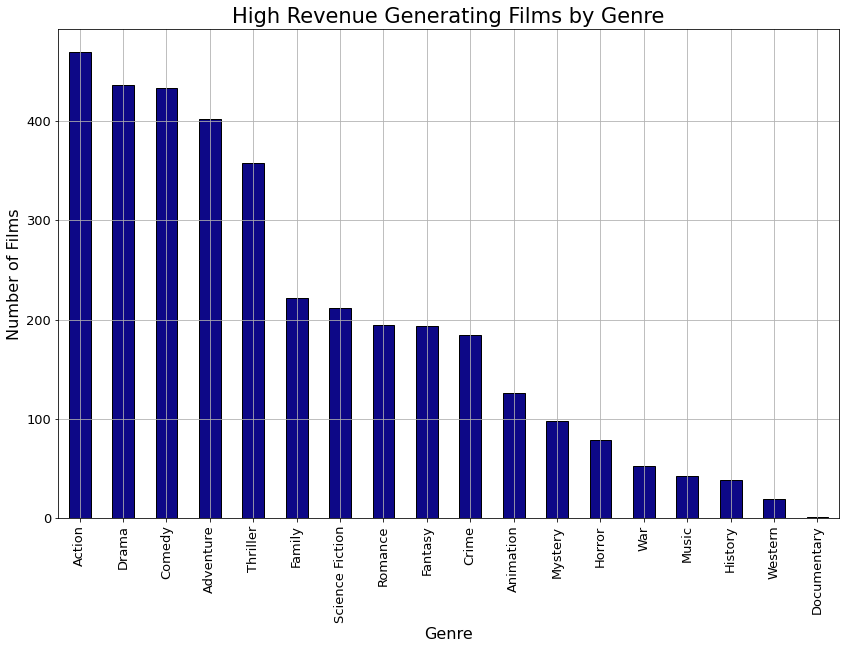

In [36]:
df_75_percentile_genre['genre_split'].value_counts().plot(kind='bar', figsize=(14,9), grid=True, fontsize=13, edgecolor='black', colormap='plasma')

plt.title('High Revenue Generating Films by Genre', fontsize=21)
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Number of Films', fontsize=16)
plt.savefig('genre_film.png', dpi = 300);

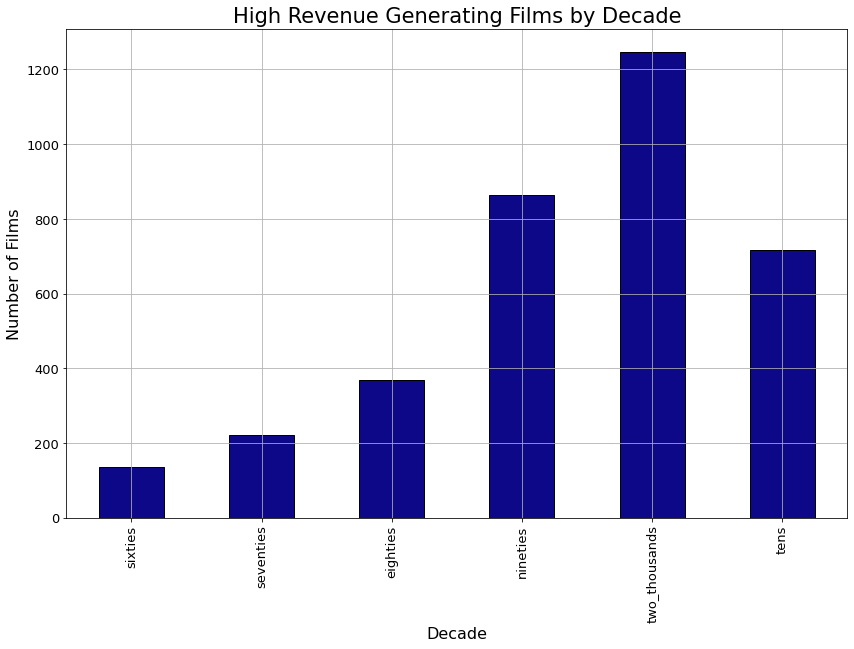

In [37]:
df_75_percentile_genre.groupby(['decade'])['id'].count().plot(kind='bar', figsize=(14,9), grid=True, fontsize=13, edgecolor='black', colormap='plasma')

plt.title('High Revenue Generating Films by Decade', fontsize=21)
plt.xlabel('Decade', fontsize=16)
plt.ylabel('Number of Films', fontsize=16)
plt.savefig('films_decade.png', dpi = 300);

Through using value_counts and count we can identify which genres and decade make up the largest proportion of the 75th percentile (for adjusted revenue). Using visualisation, we find that the genres **Action, Drama and Comedy** contribute the most films to this group. Whereas, the **2000's** are the highest contributng decade to the group.

#### Adjusted Budget

I suspect that high revenue generating films will benefit from large budgets relative to the wider film population.

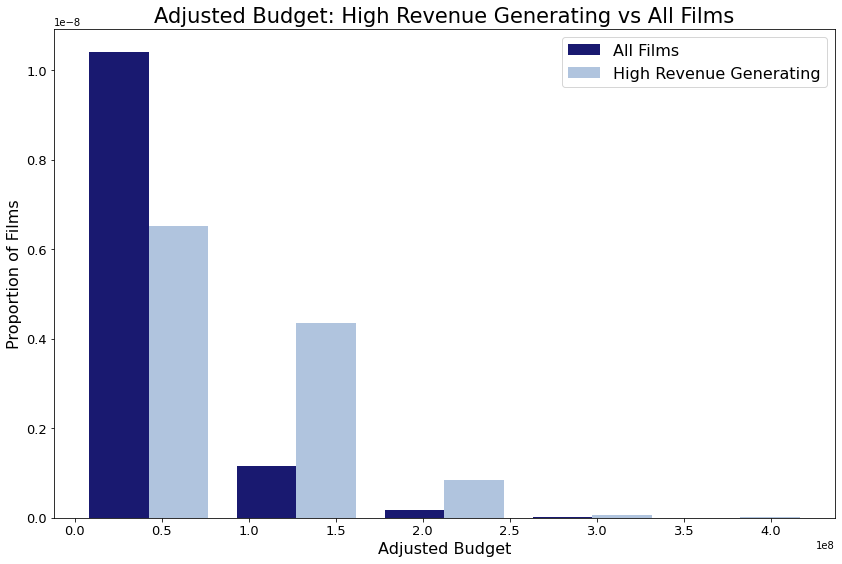

In [38]:
all_data = df['budget_adj']
data_75 = df_75_percentile_genre['budget_adj']

plt.figure(figsize=[14,9])
plt.hist([all_data, data_75], label=['All Films', 'High Revenue Generating'], density=True, bins=5, color = ['midnightblue', 'lightsteelblue'])
plt.legend(loc='upper right', fontsize=16)
plt.title('Adjusted Budget: High Revenue Generating vs All Films', fontsize=21)
plt.xlabel('Adjusted Budget', fontsize=16)
plt.ylabel('Proportion of Films', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('adj_budget.png', dpi = 300);

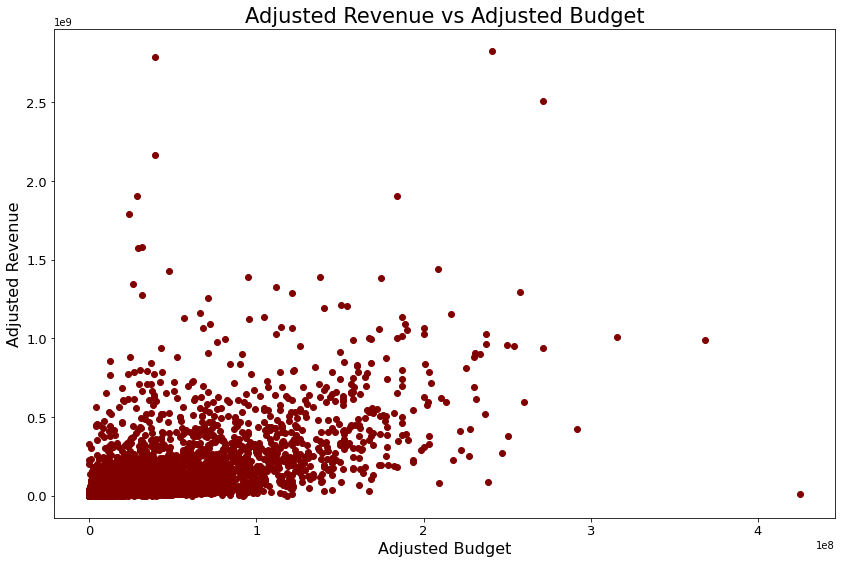

In [39]:
df_r = df['revenue_adj']
df_b = df['budget_adj']


plt.figure(figsize=[14,9])
plt.scatter(x=df_b, y=df_r, c='maroon')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Adjusted Revenue vs Adjusted Budget', fontsize=21)
plt.xlabel('Adjusted Budget', fontsize=16)
plt.ylabel('Adjusted Revenue', fontsize=16)
plt.savefig('adj_rev_bud.png', dpi = 300);

Through using a histogram we observe that films which fall into the 75th percentile of adjusted revenue have a longer tail in comparison with all films in the database. There is therefore a tendancy for high revenue generating films to have larger budgets. Furthermore, the scatter graph plots a positive correlation between adjusted revenue and adjusted budget.

#### Release Month & Duration

Perhaps there are release months and film durations which are more likely to lead to commercial success. 

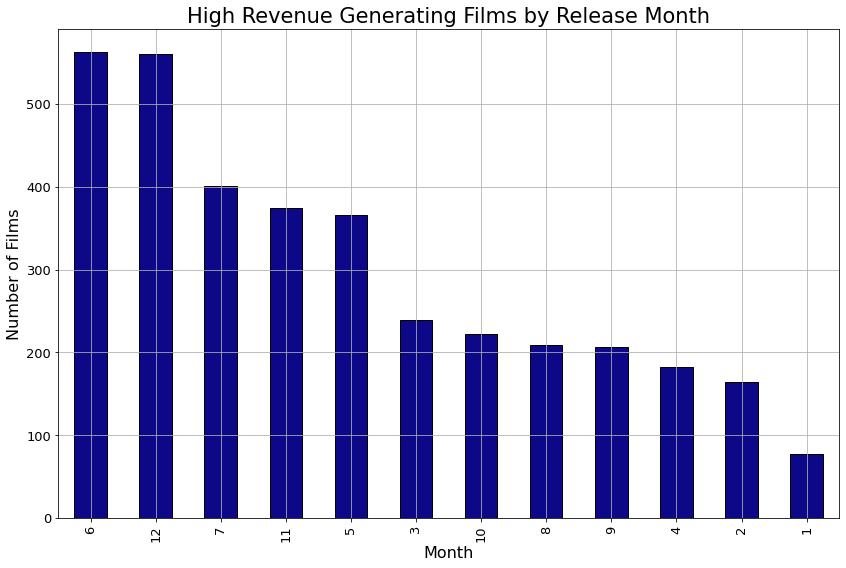

In [40]:
df_75_percentile_genre['month'].value_counts().plot(kind='bar', figsize=(14,9), grid=True, fontsize=13, edgecolor='black', colormap='plasma')

plt.title('High Revenue Generating Films by Release Month', fontsize=21)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Films', fontsize=16)
plt.savefig('month_films.png', dpi = 300);

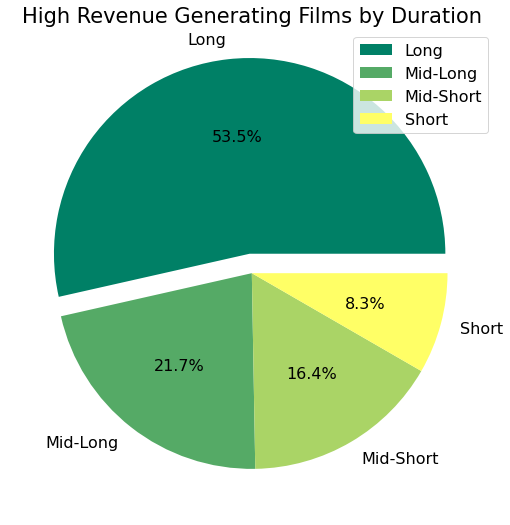

In [41]:
data_75_d = df_75_percentile_genre['duration'].value_counts()

colormap = plt.cm.summer
slices = len(data_75_d)
slice_c = colormap(np.linspace(0., 1., slices))


plt.figure(figsize=[14,9])
plt.pie(data_75_d, labels=['Long', 'Mid-Long', 'Mid-Short', 'Short'], textprops={'fontsize': 16}, autopct='%1.1f%%', colors= slice_c, explode = (0.1, 0.0, 0, 0))
plt.title('High Revenue Generating Films by Duration', fontsize=21)
plt.savefig('duration.png', dpi = 300)
plt.legend(loc='upper right', fontsize=16);

Through the use of value_counts we observe that **June and December** make up the greatest proportion of months in the 75th percentile of adjusted revenue. Through binning runtime into quartiles and using a pie chart we see that 53.5% of high revenue generating films can be considered **long**.

<a id='conclusions'></a>
## Conclusions

##### Which parties are the most active and the most profitable in the film industry?
When attempting to answer the question, *which parties are the most active and the most profitable in the film industry?* it is important to first consider who are the core parties in the industry itself. In my analysis, I addressed this question through ranking production companies, director's and cast members in term of the number of films they have participated in and in terms of the total value of the films they have been involved in by adjusted profit measure. 

When assessing production companies I found that in both activity and profitability the film industry is headed by Universal Pictures, Warner Bros. and Pararmount Pictures. The market for director's and cast members does not have such clear leaders with only the directors Steven Spielberg and Tim Burton being found in both the top 10 of the most active and most profitable rankings. Woody allen has been the most active director with 46 productions. While, Robert De Niro (72) and Samuel L. Jackson (71) have been the most active actor's. Steven Speilberg has directed the greatest sum of the most profitable films, whereas Harrison Ford leads this ranking for actors.

When turning the eye to genre and decade, I found that Drama's, Comedies and Thrillers made-up 42.5% of all films. The most profitable genres by average adjusted profit measure were Adventure and Animation. Production activity has seen major increases decade to decade, with the number of films in the 2000's growing by 105.6% when comparing with the 90's. When looking at average profitability there is however a downward trend from a peak in the 60's and 70's.

##### What qualities create a high revenue generating film?
There are undoubtedly countless ways one might identify high revenue generating films, for this analysis I chose to select the group by the 75th precentile of adjusted revenue. Through interrogating this sub-dataset I was able to uncover patterns and trends in revenue successful films. Beginning with genre, action, drama's and comedies make-up the Lions share of films - 37.5%. When observing trends over time, we find a consistent increase in the number of high revenue films through the decades, culminating with the 2000's producing 35.0% of all top revenue generating films. 

Through using a histogram I was able to show that films which fall in the 75th percentile of adjusted revenue are more likely to have larger production budgets than films which do not fall within the group. Similarly, when plotting the adjusted budget and adjusted revenue of all films we can find a positive correlation. When evaluating release month, I discovered that June and December contribute the greatest amount of high revenue films and when analysing film duration I found that significantly, 53.5% of high revenue films can be considered long in terms of runtime.

#### Limitations
##### Adjusted Budget and Adjusted Revenue
When assessing the make-up of the database, we find that both the adjusted budget and adjusted revenue are heavily made-up of 0.0 values. In fact, the values are 0.0 until the 50th percentile for both variables (half the results). There are different approaches that can be used to correct this data such as replacing with the mean or median. Given that so many values are 0.0 however, adopting one of these approaches will serve to skew the results towards the mean/ median too greatly. The results will become too distorted, therefore to maintain the reports integrity I removed the 0.0's and replaced them with not a number (NaN) values. A failure of this approach is that many films in the database will not be analysed by adjusted budget/ revenue.

##### Adjusted Profit Measure 
In the absence of clear cost information, it's important to note that the *Adjusted Profit Measure* is not profit. It is an indication of profit based upon the revenue and budget of the film. There is no guarantee that the film kept all cost to or below it's budget, this column hence demonstrates a measure of what the profit/ loss value could be in the radius of.

To uncover the most profitable parties in the film industry, I utilised groupby and summed the adjusted profit measure. It is important to note that this indicates the sum of the projects which the company or individual has worked on rather than the sum of payment received.

##### Splitting Cells with Several Values
In order to analyse the data in the columns genre, cast, director & production company I created a series of sub-dataframes with new rows for every tagging the film receieved. For example, if a film has two directors, there will be two rows for the same film in the directors sub-dataframe. This creates a double counting of a film when analysing it's directors.

#### Sources
1. https://matplotlib.org/tutorials/colors/colormaps.html
2. https://matplotlib.org/2.0.2/examples/color/named_colors.html
3. https://docs.conda.io/projects/conda/en/latest/user-guide/cheatsheet.html
4. https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet
5. https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0